Probability field of each species (alg2)

In [1]:
import os
import numpy as np
import pickle
from arguments import get_args
from matplotlib import colors
import matplotlib.pyplot as plt

args = get_args()

datapath = "alg2_heatmap_data"
savepath = "24_2_13_heatmaps"

if not os.path.exists(savepath):
   os.makedirs(savepath)

Namespace(exp_name='nh3', lattice_size=50, sim_round=10000000, num_samples=50, end_time=0.00011, alg1_lambda=0.1, alg2_lambda=0.1, alg3_lambda=0.001, tau_max=1e-08, algo=-1, path='24_1_11/')


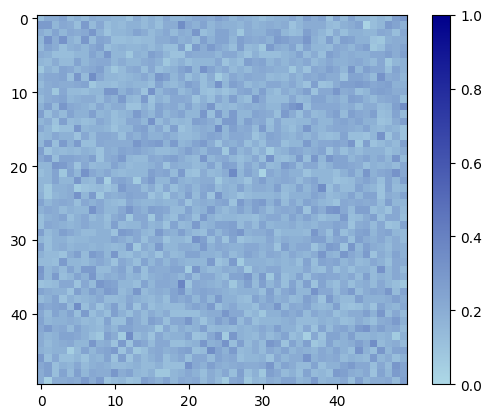

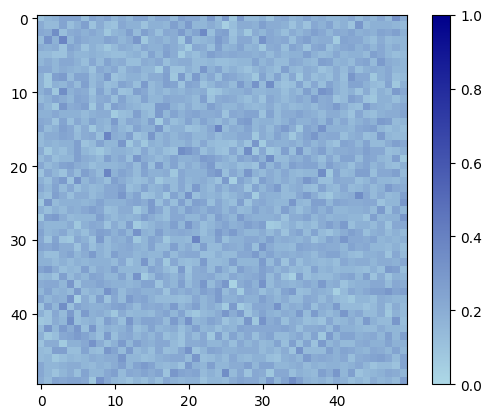

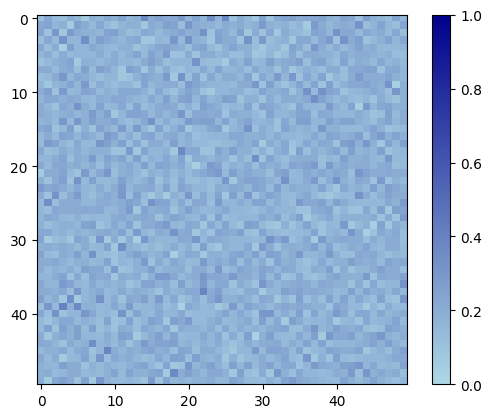

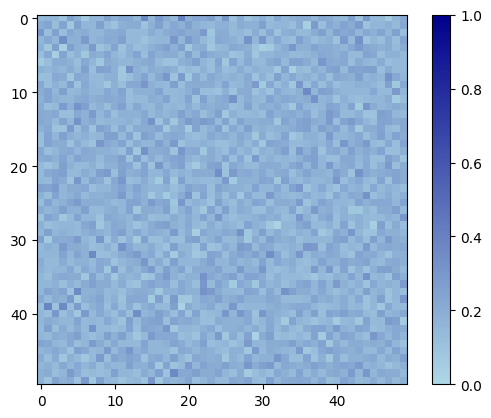

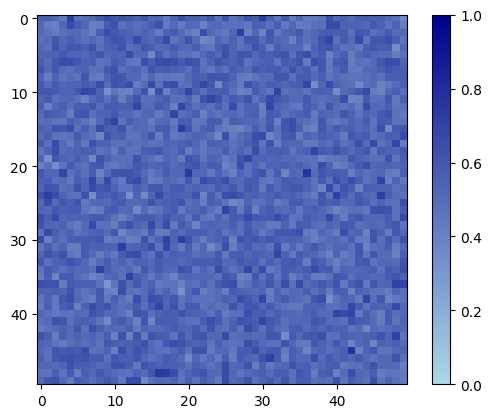

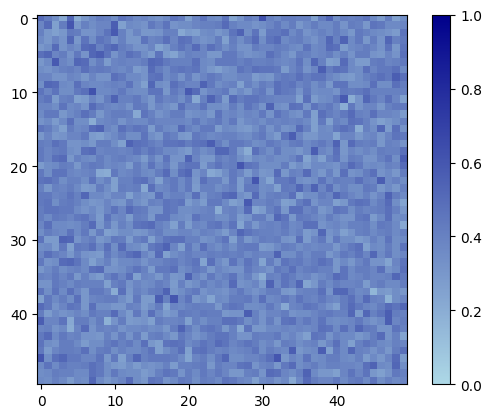

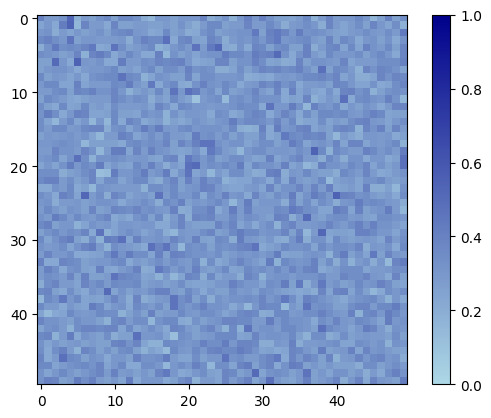

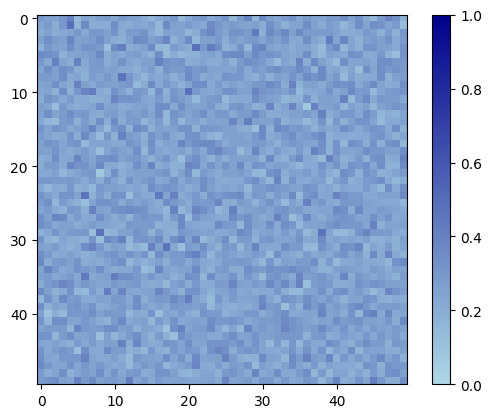

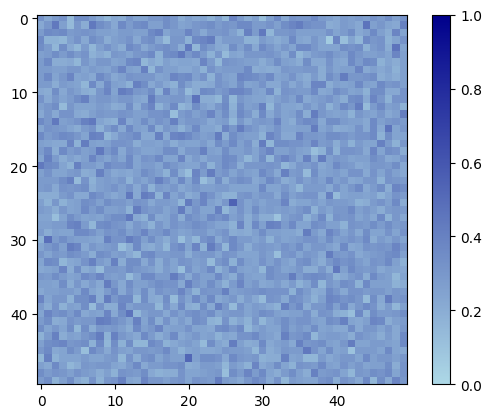

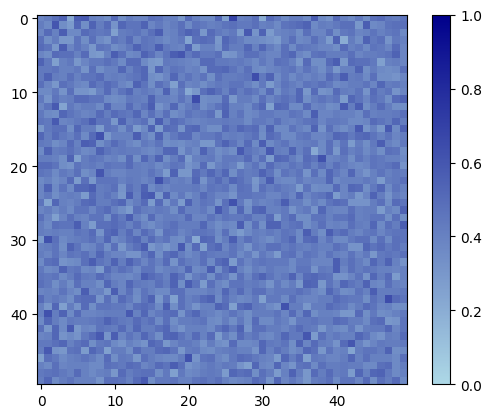

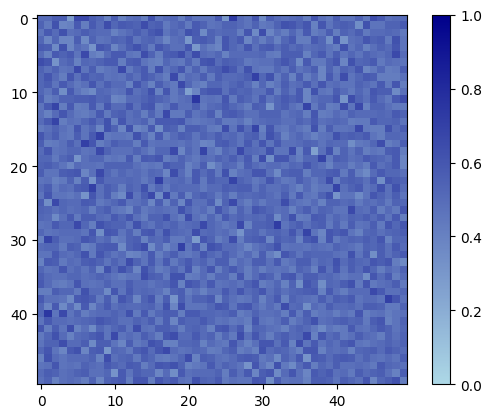

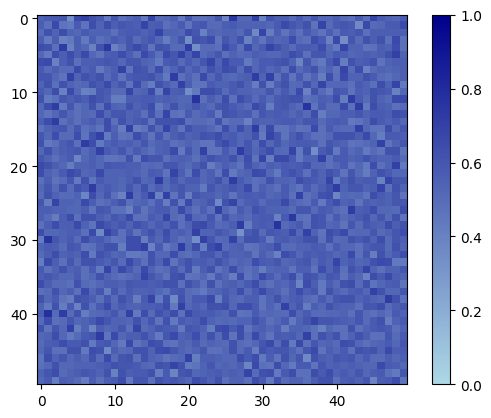

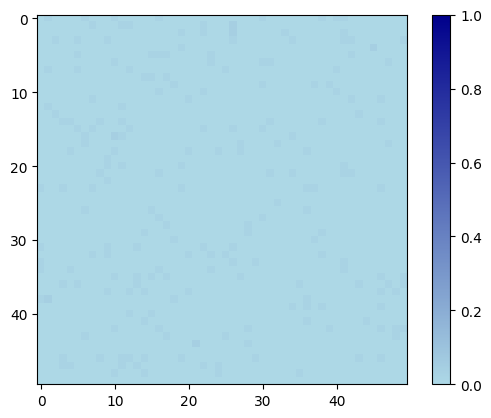

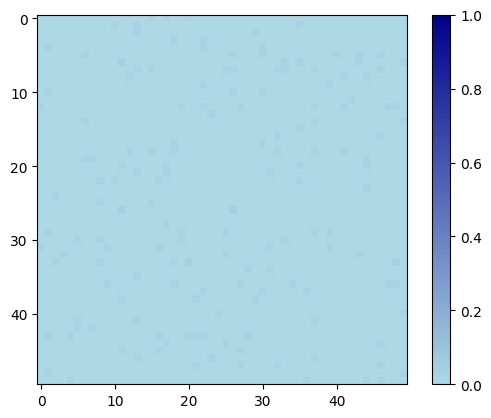

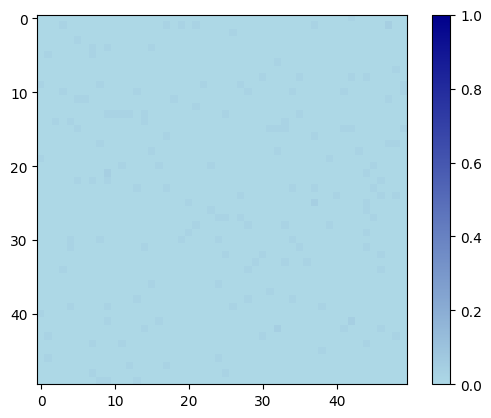

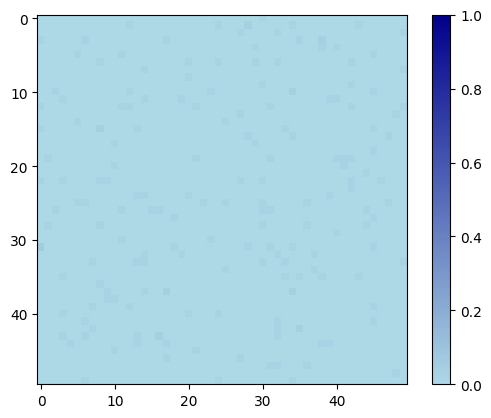

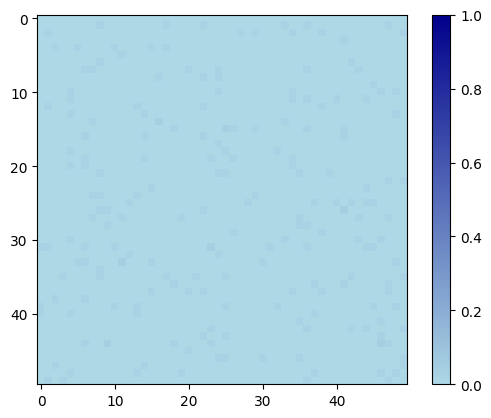

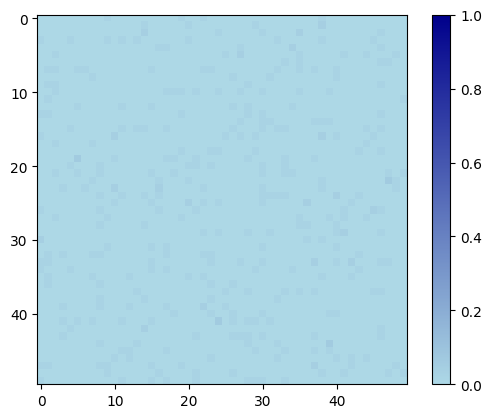

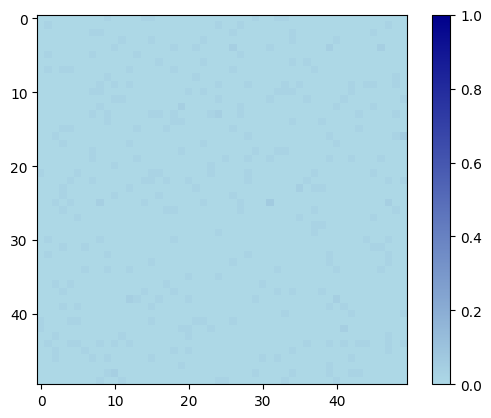

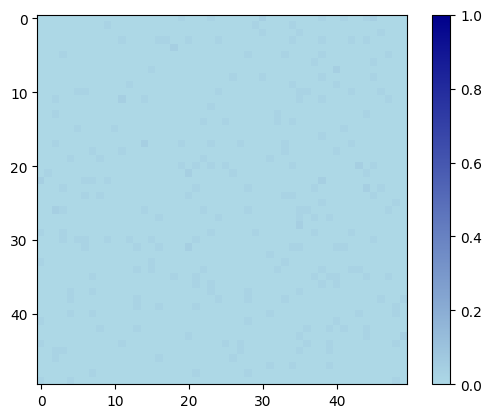

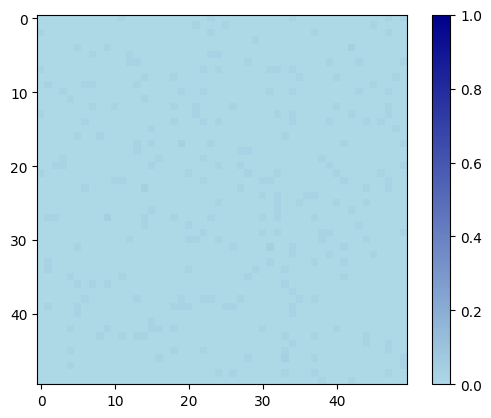

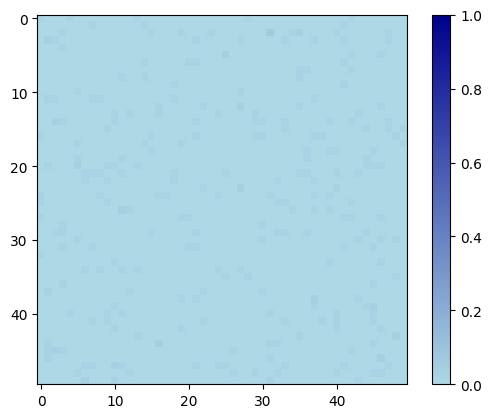

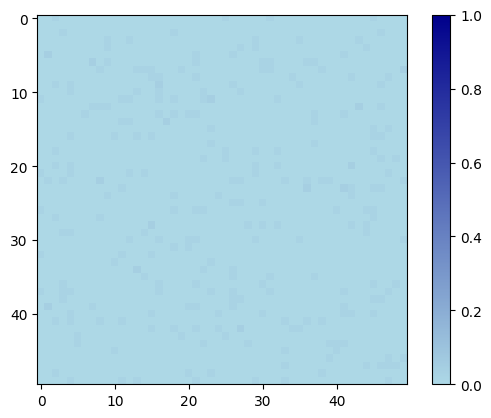

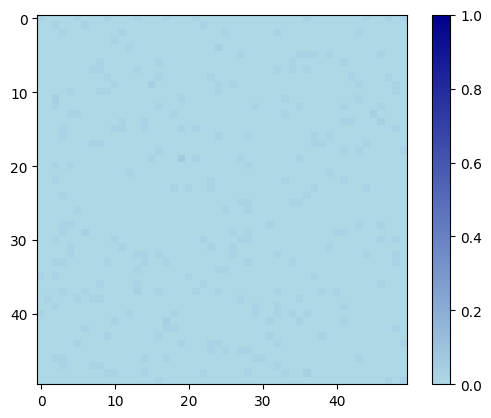

<Figure size 640x480 with 0 Axes>

In [2]:
for m in range(len(args.sim.species_names)):
    if args.sim._init_state[m] != 0:
    
        with open(os.path.join(datapath, f"size_{args.lattice_size}_sample_{args.num_samples}_{args.sim.species_names[m]}.pkl"), "rb") as file:    
            res_dict = pickle.load(file)

        for i in range(len(res_dict['t_stamps'])):
            lat = np.reshape(res_dict['lattice'][i], (50, 50))
            # cusmotized color mapping
            cmap = colors.LinearSegmentedColormap.from_list('my_cmap', ['lightblue', 'darkblue'])
            norm = colors.Normalize(vmin=0, vmax=1)
            # plot the heatmap
            plt.imshow(lat, cmap=cmap, norm=norm)
            # add colorbar
            plt.colorbar()

            sp_name = args.sim.species_names[m]
            sp_name = sp_name[:-2] if sp_name.endswith("_s") else sp_name
            
            plt.savefig(os.path.join(savepath, f'heatmap_{sp_name}_t_{res_dict["t_stamps"][i]}.png'))
            plt.savefig(os.path.join(savepath, f'heatmap_{sp_name}_t_{res_dict["t_stamps"][i]}.pdf'))
            plt.show()
            plt.clf()